# Credit | Loan Defaulters Prediction

### Objective: As a Data Analyst woking for consumer finance company which specilaizes in various type of loans to urban customers. We need to perform EDAto ensure that - 
    1. Applicants capable of  repaying the loan are not rejected which in turn will benefit the company business
    2. Identify the applicants tend to default the  loan which is turn will result in loss to the company

### Overview of Data Set

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

1. The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample

2. All other cases: All other cases when the payment is paid on time.

### High-level Steps to work on this case study
1. Understand the nature of the data 
2. Clean the data to level of clarity
3. Perform analytical steps to understand the dependency of attributes
4. Use visualization to get holistic picture of the data
5. Identify the Key driving factors behind loan default

In [243]:
## Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [241]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [12]:
## Import the data application data & previous application data

dfa = pd.read_csv('application_data.csv')
dfpa = pd.read_csv('previous_application.csv')

In [4]:
## Check the subset of data for application_data

dfa.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
## Check the subset of data for previous_application_data

dfpa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## check the shape of data

dfa.shape, dfpa.shape

((307511, 122), (1670214, 37))

In [19]:
## Identify the columns where more than 50% data is missing

x = len(dfa)/2
dfa = dfa[dfa.columns[dfa.isnull().sum() < x]]


In [21]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [22]:
dfa.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
# ## check the data imbalance based on Target customer

dfa.groupby('TARGET').agg({'SK_ID_CURR':'count'})

,SK_ID_CURR
TARGET,
0,282686
1,24825


## Observation

1. ~8% of customers are having trouble in repaying the loan/EMI regularly

In [25]:
dfa.groupby(['TARGET','CODE_GENDER']).agg({'SK_ID_CURR':'count'})

SK_ID_CURR
TARGET CODE_GENDER            
0      F                188278
       M                 94404
       XNA                   4
1      F                 14170
       M                 10655

In [28]:
# Create Pivot table to get more  readable data

dfa.pivot_table(index = 'TARGET', columns = 'CODE_GENDER', values = 'SK_ID_CURR', aggfunc = 'count')

CODE_GENDER,F,M,XNA
TARGET,,,
0,188278.0,94404.0,4.0
1,14170.0,10655.0,NaN


In [29]:
dfa.groupby('CODE_GENDER').agg({'SK_ID_CURR':'count'})

,SK_ID_CURR
CODE_GENDER,
F,202448
M,105059
XNA,4


### Observations based data imbalance check performed above on application_data
1. ~Twice the Female customers applied for various loans than male customers. Need to check the loan type  where females have applied for loan.
1. Target 1(client with payment difficulties) - Female customers (57%) tends to have irregularities is paying loan as compared to male customers (43%). Further check that needs to perform the occupation of the female to understand this observation
2. Target 0 - Even though the female customers are more for loan application the regularity of loan repayment is maintained in the same proportion.

In [178]:
## Divide the dataset into Targets 1 & 0 to perform analysis on granular level

dfa_T0 = dfa[dfa['TARGET']==0]
dfa_T1 = dfa[dfa['TARGET']==1]

In [31]:
#check the data shape

dfa_T0.shape, dfa_T1.shape

((282686, 81), (24825, 81))

## Observation based on the bifurcation of data done on TARGET attribute
1. Only ~8 of the customers are repaying there loann without any irregularities. Need to check the Income & profession of these customers who are  regular in repaying the loans
2. ~92% of the customers are having irregulaties in paying the loan

In [34]:
# Lets first analyze data for TARGET 0 customers

dfa_T0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    282686 non-null  int64  
 1   TARGET                        282686 non-null  int64  
 2   NAME_CONTRACT_TYPE            282686 non-null  object 
 3   CODE_GENDER                   282686 non-null  object 
 4   FLAG_OWN_CAR                  282686 non-null  object 
 5   FLAG_OWN_REALTY               282686 non-null  object 
 6   CNT_CHILDREN                  282686 non-null  int64  
 7   AMT_INCOME_TOTAL              282686 non-null  float64
 8   AMT_CREDIT                    282686 non-null  float64
 9   AMT_ANNUITY                   282674 non-null  float64
 10  AMT_GOODS_PRICE               282429 non-null  float64
 11  NAME_TYPE_SUITE               281464 non-null  object 
 12  NAME_INCOME_TYPE              282686 non-nul

In [179]:
dfa['EMERGENCYSTATE_MODE'].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [180]:
# Dropping the columns related to Document submission. Eg - Flag_Document_2
dfa_T0.drop(dfa_T0.iloc[:,55:75],axis = 1, inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [181]:
dfa_T0.shape

(282686, 61)

In [182]:
dfa_T0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 61 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    282686 non-null  int64  
 1   TARGET                        282686 non-null  int64  
 2   NAME_CONTRACT_TYPE            282686 non-null  object 
 3   CODE_GENDER                   282686 non-null  object 
 4   FLAG_OWN_CAR                  282686 non-null  object 
 5   FLAG_OWN_REALTY               282686 non-null  object 
 6   CNT_CHILDREN                  282686 non-null  int64  
 7   AMT_INCOME_TOTAL              282686 non-null  float64
 8   AMT_CREDIT                    282686 non-null  float64
 9   AMT_ANNUITY                   282674 non-null  float64
 10  AMT_GOODS_PRICE               282429 non-null  float64
 11  NAME_TYPE_SUITE               281464 non-null  object 
 12  NAME_INCOME_TYPE              282686 non-nul

In [183]:
## Removing the normalize data related to attributes of building where customer is living. As for now this data will not have significant impact on the analysis

dfa_T0.drop(dfa_T0.iloc[:,42:50],axis = 1, inplace = True)


In [184]:
dfa_T0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   282686 non-null  int64  
 1   TARGET                       282686 non-null  int64  
 2   NAME_CONTRACT_TYPE           282686 non-null  object 
 3   CODE_GENDER                  282686 non-null  object 
 4   FLAG_OWN_CAR                 282686 non-null  object 
 5   FLAG_OWN_REALTY              282686 non-null  object 
 6   CNT_CHILDREN                 282686 non-null  int64  
 7   AMT_INCOME_TOTAL             282686 non-null  float64
 8   AMT_CREDIT                   282686 non-null  float64
 9   AMT_ANNUITY                  282674 non-null  float64
 10  AMT_GOODS_PRICE              282429 non-null  float64
 11  NAME_TYPE_SUITE              281464 non-null  object 
 12  NAME_INCOME_TYPE             282686 non-null  object 
 13 

In [185]:
## Explore the attributes

dfa_T0['AMT_ANNUITY'].isnull().sum()

12

In [186]:
# Null check for identified columns
def nullcheck(column):
    x = 0
    x = dfa_T0[column].isnull().sum()
    return(x)

In [187]:
nullcheck('AMT_ANNUITY')

12

In [188]:
list1 = []
for i in arr2:
    a = nullcheck(i)
    list1.append(a)
arr1 =np.array(list1)

In [189]:
arr2 = np.array(dfa_T0.columns)

In [190]:
arr1.shape, arr2.shape

((53,), (53,))

In [191]:
arr2[arr1!= 0]

array(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype=object)

In [192]:
dfa_T0[dfa_T0.AMT_ANNUITY.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,0.0,0.0,0.0,-706.0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0.0,1.0,0.0,-199.0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,0.0,0.0,0.0,-2841.0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0.0,0.0,0.0,-743.0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,0.0,0.0,0.0,-1986.0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,0.0,0.0,0.0,-348.0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,0.0,0.0,0.0,-1331.0,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,0.0,0.0,0.0,-295.0,0.0,0.0,1.0,1.0,0.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,0.0,1.0,0.0,-1255.0,0.0,0.0,1.0,0.0,0.0,2.0


In [193]:
## As record count for null AMT_ANNUITY is very less as compared to the total record count, we can delete these records  as it will not have major impact on analysis

dfa_T0 = dfa_T0[~dfa_T0.AMT_ANNUITY.isnull()]

In [194]:
dfa_T0[dfa_T0.AMT_GOODS_PRICE.isnull()].shape

(257, 53)

In [195]:
dfa_T0['AMT_GOODS_PRICE'].mean(), dfa_T0['AMT_GOODS_PRICE'].median()

(542738.2178693209, 450000.0)

In [196]:
## As there is a substantial difference in median value and mean value for AMT_GOODS_PRICE attribute, we will udpate 257 records with median value

dfa_T0['AMT_GOODS_PRICE'] = dfa_T0['AMT_GOODS_PRICE'].fillna(dfa_T0['AMT_GOODS_PRICE'].median())

In [197]:
dfa_T0[dfa_T0.AMT_GOODS_PRICE.isnull()].shape

(0, 53)

In [198]:
arr1

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
          12,   257,  1222,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
       90113,     2,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,   608, 55288,   985,   985,   985,
         985,     1, 37227, 37227, 37227, 37227, 37227, 37227],
      dtype=int64)

In [199]:
dfa_T0['NAME_TYPE_SUITE'].isnull().sum()

1222

In [200]:
## Identify the most common value occurence for NAME_TYPE_SUITE attribute
dfa_T0.groupby(['NAME_TYPE_SUITE']).agg({'SK_ID_CURR':'count'})

,SK_ID_CURR
NAME_TYPE_SUITE,
Children,3026
Family,37139
Group of people,248
Other_A,790
Other_B,1596
"Spouse, partner",10475
Unaccompanied,228178


In [201]:
## As major customer were unaccompanied while filing for the loan, we can use same value for missing values
dfa_T0['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace = True)

In [202]:
dfa_T0.groupby(['NAME_TYPE_SUITE']).agg({'SK_ID_CURR':'count'})

,SK_ID_CURR
NAME_TYPE_SUITE,
Children,3026
Family,37139
Group of people,248
Other_A,790
Other_B,1596
"Spouse, partner",10475
Unaccompanied,229400


In [203]:
dfa_T0['OCCUPATION_TYPE'].value_counts()

Laborers                 49346
Sales staff              29009
Core staff               25831
Managers                 20042
Drivers                  16495
High skill tech staff    10678
Accountants               9338
Medicine staff            7964
Security staff            5998
Cooking staff             5324
Cleaning staff            4206
Private service staff     2477
Low-skill Laborers        1734
Secretaries               1212
Waiters/barmen staff      1196
Realty agents              692
HR staff                   527
IT staff                   492
Name: OCCUPATION_TYPE, dtype: int64

In [204]:
dfa_T0['EXT_SOURCE_2'].describe()

count    2.820660e+05
mean     5.234767e-01
std      1.862770e-01
min      8.173617e-08
25%      4.097813e-01
50%      5.739020e-01
75%      6.677051e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [205]:
dfa_T0['EXT_SOURCE_2'].fillna(dfa_T0['EXT_SOURCE_2'].mean(), inplace = True)

In [206]:
## As the difference in mean and median value is not big, replacing the NA with mean value for the series
dfa_T0['EXT_SOURCE_3'].fillna(dfa_T0['EXT_SOURCE_3'].mean(), inplace = True)

In [207]:
dfa_T0['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    281689.000000
mean          1.415792
std           2.402896
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [208]:
## As there is a difference between mean and median values, replacing NA with median value

dfa_T0['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(dfa_T0['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace = True)
dfa_T0['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(dfa_T0['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace = True)

In [209]:
## As there is a minimal difference between mean and median values, replacing NA with median value as we need whole number

dfa_T0['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(dfa_T0['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace = True)
dfa_T0['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(dfa_T0['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace = True)

In [210]:
dfa_T0['DAYS_LAST_PHONE_CHANGE'].describe()

count    282673.000000
mean       -976.392485
std         831.211589
min       -4292.000000
25%       -1586.000000
50%        -776.000000
75%        -281.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [211]:
## As there is a difference between mean and median values, replacing NA with median value

dfa_T0['DAYS_LAST_PHONE_CHANGE'].fillna(dfa_T0['DAYS_LAST_PHONE_CHANGE'].median(), inplace = True)

In [212]:
dfa_T0['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    243953
1.0      1435
2.0        50
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [213]:
dfa_T0['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    244100
1.0      1167
2.0        95
3.0        43
4.0        23
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [214]:
dfa_T0['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    237583
1.0      7567
2.0       179
3.0        54
4.0        30
6.0        19
5.0         9
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [215]:
dfa_T0['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     204912
1.0      30583
2.0       5006
3.0       1883
4.0       1016
5.0        562
6.0        325
7.0        281
9.0        198
8.0        179
10.0       121
11.0       115
12.0        76
13.0        69
14.0        39
15.0        34
16.0        23
17.0        13
18.0         6
19.0         3
27.0         1
22.0         1
23.0         1
24.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [216]:
dfa_T0['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      198504
1.0       31632
2.0       13209
3.0        1591
4.0         419
5.0          58
6.0          21
8.0           7
7.0           6
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [217]:
dfa_T0['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     66677
1.0     58751
2.0     46122
3.0     30952
4.0     19003
5.0     11048
6.0      6334
7.0      3513
8.0      1944
9.0       977
12.0       28
11.0       28
10.0       19
13.0       18
17.0        7
14.0        7
15.0        6
19.0        4
18.0        4
16.0        2
21.0        1
20.0        1
23.0        1
25.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [218]:
dfa_T0['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    245448.000000
mean          1.889146
std           1.863285
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [219]:
## Replacing the median value in place of nulls

dfa_T0['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(dfa_T0['AMT_REQ_CREDIT_BUREAU_HOUR'].median(), inplace = True)
dfa_T0['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(dfa_T0['AMT_REQ_CREDIT_BUREAU_DAY'].median(), inplace = True)
dfa_T0['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(dfa_T0['AMT_REQ_CREDIT_BUREAU_WEEK'].median(), inplace = True)
dfa_T0['AMT_REQ_CREDIT_BUREAU_MON'].fillna(dfa_T0['AMT_REQ_CREDIT_BUREAU_MON'].median(), inplace = True)
dfa_T0['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(dfa_T0['AMT_REQ_CREDIT_BUREAU_QRT'].median(), inplace = True)
dfa_T0['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(dfa_T0['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace = True)

In [220]:
dfa_T0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282674 entries, 1 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   282674 non-null  int64  
 1   TARGET                       282674 non-null  int64  
 2   NAME_CONTRACT_TYPE           282674 non-null  object 
 3   CODE_GENDER                  282674 non-null  object 
 4   FLAG_OWN_CAR                 282674 non-null  object 
 5   FLAG_OWN_REALTY              282674 non-null  object 
 6   CNT_CHILDREN                 282674 non-null  int64  
 7   AMT_INCOME_TOTAL             282674 non-null  float64
 8   AMT_CREDIT                   282674 non-null  float64
 9   AMT_ANNUITY                  282674 non-null  float64
 10  AMT_GOODS_PRICE              282674 non-null  float64
 11  NAME_TYPE_SUITE              282674 non-null  object 
 12  NAME_INCOME_TYPE             282674 non-null  object 
 13 

In [221]:
dfa_T0['OCCUPATION_TYPE'].fillna('Unknown', inplace = True)

In [222]:
dfa_T0['CNT_FAM_MEMBERS'].describe()

count    282672.000000
mean          2.150171
std           0.906995
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [223]:
dfa_T0['CNT_FAM_MEMBERS'].fillna(dfa_T0['CNT_FAM_MEMBERS'].median(), inplace = True)

In [224]:
## Inconsistency in data is removed for Target 0 data
dfa_T0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282674 entries, 1 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   282674 non-null  int64  
 1   TARGET                       282674 non-null  int64  
 2   NAME_CONTRACT_TYPE           282674 non-null  object 
 3   CODE_GENDER                  282674 non-null  object 
 4   FLAG_OWN_CAR                 282674 non-null  object 
 5   FLAG_OWN_REALTY              282674 non-null  object 
 6   CNT_CHILDREN                 282674 non-null  int64  
 7   AMT_INCOME_TOTAL             282674 non-null  float64
 8   AMT_CREDIT                   282674 non-null  float64
 9   AMT_ANNUITY                  282674 non-null  float64
 10  AMT_GOODS_PRICE              282674 non-null  float64
 11  NAME_TYPE_SUITE              282674 non-null  object 
 12  NAME_INCOME_TYPE             282674 non-null  object 
 13 

In [173]:
## Analyze the dfa_T1 data and clean it

dfa_T1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 81 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    24825 non-null  int64  
 1   TARGET                        24825 non-null  int64  
 2   NAME_CONTRACT_TYPE            24825 non-null  object 
 3   CODE_GENDER                   24825 non-null  object 
 4   FLAG_OWN_CAR                  24825 non-null  object 
 5   FLAG_OWN_REALTY               24825 non-null  object 
 6   CNT_CHILDREN                  24825 non-null  int64  
 7   AMT_INCOME_TOTAL              24825 non-null  float64
 8   AMT_CREDIT                    24825 non-null  float64
 9   AMT_ANNUITY                   24825 non-null  float64
 10  AMT_GOODS_PRICE               24804 non-null  float64
 11  NAME_TYPE_SUITE               24755 non-null  object 
 12  NAME_INCOME_TYPE              24825 non-null  object 
 13  

In [225]:
## Remove unwanted columns

dfa_T1.drop(dfa_T1.iloc[:,55:75],axis = 1, inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [226]:
dfa_T1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    24825 non-null  int64  
 1   TARGET                        24825 non-null  int64  
 2   NAME_CONTRACT_TYPE            24825 non-null  object 
 3   CODE_GENDER                   24825 non-null  object 
 4   FLAG_OWN_CAR                  24825 non-null  object 
 5   FLAG_OWN_REALTY               24825 non-null  object 
 6   CNT_CHILDREN                  24825 non-null  int64  
 7   AMT_INCOME_TOTAL              24825 non-null  float64
 8   AMT_CREDIT                    24825 non-null  float64
 9   AMT_ANNUITY                   24825 non-null  float64
 10  AMT_GOODS_PRICE               24804 non-null  float64
 11  NAME_TYPE_SUITE               24755 non-null  object 
 12  NAME_INCOME_TYPE              24825 non-null  object 
 13  

In [227]:
## Remove unwanted columns.

dfa_T1.drop(dfa_T1.iloc[:,42:50],axis = 1, inplace = True)

In [228]:
dfa_T1.shape

(24825, 53)

In [229]:
dfa_T1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   24825 non-null  int64  
 1   TARGET                       24825 non-null  int64  
 2   NAME_CONTRACT_TYPE           24825 non-null  object 
 3   CODE_GENDER                  24825 non-null  object 
 4   FLAG_OWN_CAR                 24825 non-null  object 
 5   FLAG_OWN_REALTY              24825 non-null  object 
 6   CNT_CHILDREN                 24825 non-null  int64  
 7   AMT_INCOME_TOTAL             24825 non-null  float64
 8   AMT_CREDIT                   24825 non-null  float64
 9   AMT_ANNUITY                  24825 non-null  float64
 10  AMT_GOODS_PRICE              24804 non-null  float64
 11  NAME_TYPE_SUITE              24755 non-null  object 
 12  NAME_INCOME_TYPE             24825 non-null  object 
 13  NAME_EDUCATION_

In [230]:
dfa_T1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                  21
NAME_TYPE_SUITE                  70
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE             

In [231]:
## As we have already analysed the data for below mentioned attributes for Target 0 customers, we will make the similar changes for Target 1 customers as nature of the data remains same.

dfa_T1['EXT_SOURCE_2'].fillna(dfa_T1['EXT_SOURCE_2'].mean(), inplace = True)
dfa_T1['OCCUPATION_TYPE'].fillna('Unknown', inplace = True)
dfa_T1['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace = True)
dfa_T1['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(dfa_T1['AMT_REQ_CREDIT_BUREAU_HOUR'].median(), inplace = True)
dfa_T1['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(dfa_T1['AMT_REQ_CREDIT_BUREAU_DAY'].median(), inplace = True)
dfa_T1['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(dfa_T1['AMT_REQ_CREDIT_BUREAU_WEEK'].median(), inplace = True)
dfa_T1['AMT_REQ_CREDIT_BUREAU_MON'].fillna(dfa_T1['AMT_REQ_CREDIT_BUREAU_MON'].median(), inplace = True)
dfa_T1['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(dfa_T1['AMT_REQ_CREDIT_BUREAU_QRT'].median(), inplace = True)
dfa_T1['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(dfa_T1['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), inplace = True)
dfa_T1['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(dfa_T1['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace = True)
dfa_T1['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(dfa_T1['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace = True)
dfa_T1['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(dfa_T1['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace = True)
dfa_T1['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(dfa_T1['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [234]:
dfa_T1['AMT_GOODS_PRICE'].fillna(dfa_T1['AMT_GOODS_PRICE'].median(), inplace = True)

In [235]:
dfa_T1['EXT_SOURCE_2'].fillna(dfa_T1['EXT_SOURCE_3'].mean(), inplace = True)

In [236]:
## Data cleaning for Target 1 customer is completed
dfa_T1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   24825 non-null  int64  
 1   TARGET                       24825 non-null  int64  
 2   NAME_CONTRACT_TYPE           24825 non-null  object 
 3   CODE_GENDER                  24825 non-null  object 
 4   FLAG_OWN_CAR                 24825 non-null  object 
 5   FLAG_OWN_REALTY              24825 non-null  object 
 6   CNT_CHILDREN                 24825 non-null  int64  
 7   AMT_INCOME_TOTAL             24825 non-null  float64
 8   AMT_CREDIT                   24825 non-null  float64
 9   AMT_ANNUITY                  24825 non-null  float64
 10  AMT_GOODS_PRICE              24825 non-null  float64
 11  NAME_TYPE_SUITE              24825 non-null  object 
 12  NAME_INCOME_TYPE             24825 non-null  object 
 13  NAME_EDUCATION_

### Now visualize the data to get more insights on the attributes and impact on our objective
#### Key factors to consider
1. CODE_GENDER
2. AMT_INCOME_TOTAL
3. AMT_GOODS_PRICE
4. NAME_INCOME_TYPE
5. NAME_EDUCATION_TYPE
6. NAME_FAMILY_STATUS
7. OCCUPATION_TYPE
8. CNT_FAM_MEMBERS
9. ORGANIZATION_TYPE

In [248]:
dfa_T0.shape, dfa_T1.shape

((282674, 53), (24825, 53))

<AxesSubplot:title={'center':'Target 0 - Customers'}, xlabel='NAME_INCOME_TYPE', ylabel='count'>

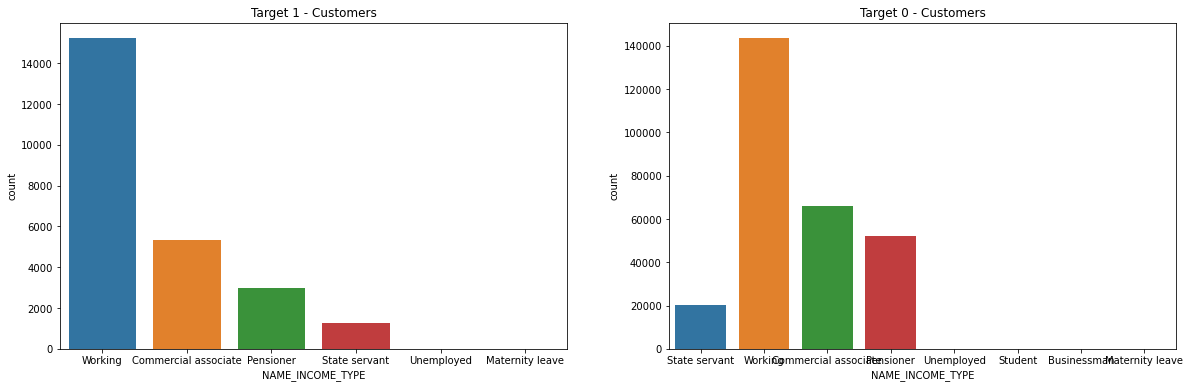

In [247]:
## Loan Repayment mentality of customers based on there income type

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Target 1 - Customers')
sns.countplot(x='NAME_INCOME_TYPE',data=dfa_T1)
plt.subplot(1,2,2)
plt.title('Target 0 - Customers')
sns.countplot(x='NAME_INCOME_TYPE',data=dfa_T0)

<AxesSubplot:xlabel='NAME_INCOME_TYPE'>

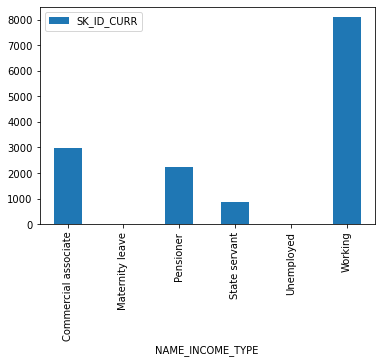

In [547]:
## Checking source of income for female inidividuals 

dfa_T1[dfa_T1['CODE_GENDER']=='F'].groupby('NAME_INCOME_TYPE').agg({'SK_ID_CURR':'count'}).plot.bar()

<AxesSubplot:xlabel='OCCUPATION_TYPE'>

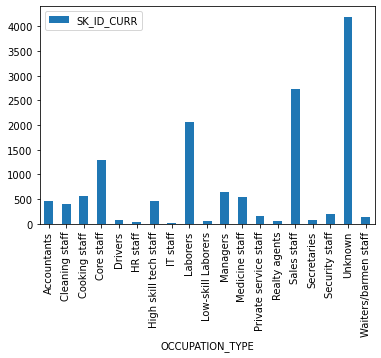

In [548]:
## Checking Female customers who pplied for loan are alignesd to which tyoe of accupation
dfa_T1[dfa_T1['CODE_GENDER']=='F'].groupby('OCCUPATION_TYPE').agg({'SK_ID_CURR':'count'}).plot.bar()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x720 with 0 Axes>

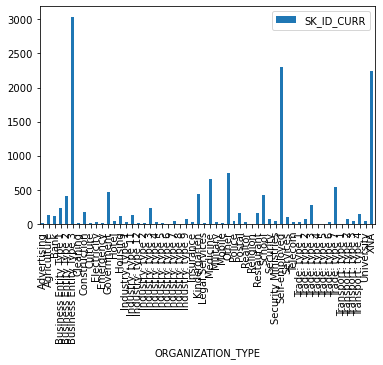

In [556]:
## Checking Female customers working in which organization types
plt.figure(figsize=(20,10))
dfa_T1[dfa_T1['CODE_GENDER']=='F'].groupby('ORGANIZATION_TYPE').agg({'SK_ID_CURR':'count'}).plot.bar()
plt.show

## Observations for Income type VS Coustomer Count plot got Traget 1 & Target 0 customers

#### Target 1 - Customers with payment irregularies
1. Customers with Income Type as 'Working' are the ones appliying for loan and are more prone to repayment irregularities compared to other Income Types
2. Need to check the income of the Working class which are the ones defaulting more

#### Overall 

1. Behaviour of customers with same income type under Target-1 & Target-0 group is similar.

In [288]:
## segmentation of AMT_INCOME_TOTAL

dfa_T0['Income_GRP'] = pd.cut(dfa_T0.AMT_INCOME_TOTAL,[0,10000,100000,1000000, 5000000, 99999999], labels = ['No Income','Poor','Middle Class','Higher Middle Class','Rich'])
dfa_T1['Income_GRP'] = pd.cut(dfa_T1.AMT_INCOME_TOTAL,[0,10000,100000,1000000, 5000000, 99999999], labels = ['No Income','Poor','Middle Class','Higher Middle Class','Rich'])

In [289]:
dfa_T0['Income_GRP']

1         Middle Class
2                 Poor
3         Middle Class
4         Middle Class
5                 Poor
              ...     
307505    Middle Class
307506    Middle Class
307507            Poor
307508    Middle Class
307510    Middle Class
Name: Income_GRP, Length: 282674, dtype: category
Categories (5, object): ['No Income' < 'Poor' < 'Middle Class' < 'Higher Middle Class' < 'Rich']

In [250]:
dfa.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

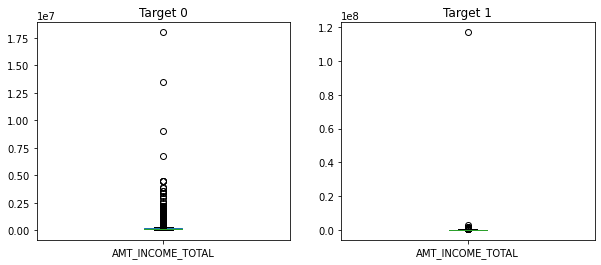

In [257]:
## Box plot for AMT_INCOME_TOTAL

plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
plt.title('Target 0')
dfa_T0.AMT_INCOME_TOTAL.plot.box()
plt.subplot(1,2,2)
plt.title('Target 1')
dfa_T1.AMT_INCOME_TOTAL.plot.box()
plt.show

## Observations

1. Both Target 0 & Target 1 customers have outliers due to which plot is getting sqeezed and unable to perform analysis

## Next steps
1. Seperate out the outliers from Target 1 customers data set to analyse

In [290]:
dfa_T0.groupby('Income_GRP').agg({'SK_ID_CURR':'count'})

,SK_ID_CURR
Income_GRP,
No Income,0
Poor,58471
Middle Class,223966
Higher Middle Class,233
Rich,4


In [291]:
dfa_T1.groupby('Income_GRP').agg({'SK_ID_CURR':'count'})

,SK_ID_CURR
Income_GRP,
No Income,0
Poor,5225
Middle Class,19587
Higher Middle Class,12
Rich,0


In [352]:
## Coverting income into Lakhs
dfa_T0['AMT_INCOME_TOTAL'] = dfa_T0['AMT_INCOME_TOTAL']/100000
dfa_T1['AMT_INCOME_TOTAL'] = dfa_T1['AMT_INCOME_TOTAL']/100000

In [353]:
dfa_T0['AMT_INCOME_TOTAL'] = dfa_T0['AMT_INCOME_TOTAL'].round(2)
dfa_T1['AMT_INCOME_TOTAL'] = dfa_T1['AMT_INCOME_TOTAL'].round(2)

In [370]:
## segmentation of AMT_INCOME_TOTAL

dfa_T0['Income_GRP'] = pd.cut(dfa_T0.AMT_INCOME_TOTAL,[0,0.5,1,10,50,99], labels = ['No Income','Poor','Middle Class','Higher Middle Class','Rich'])
dfa_T1['Income_GRP'] = pd.cut(dfa_T1.AMT_INCOME_TOTAL,[0,0.5,1,10,50,99], labels = ['No Income','Poor','Middle Class','Higher Middle Class','Rich'])

<AxesSubplot:title={'center':'Target 0 - Customers'}, xlabel='CODE_GENDER', ylabel='count'>

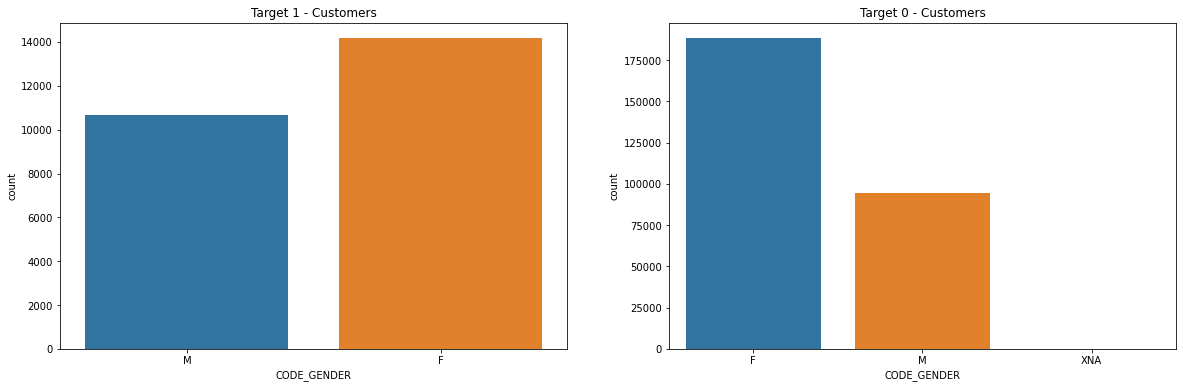

In [326]:
# Gender count plot for Target 0 & Target 1
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Target 1 - Customers')
sns.countplot(x='CODE_GENDER',data=dfa_T1)
plt.subplot(1,2,2)
plt.title('Target 0 - Customers')
sns.countplot(x='CODE_GENDER',data=dfa_T0)


In [339]:
# Define funtion to check impact of key factors on loan repayment activity

def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=dfa_T0, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=dfa_T1, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1')

    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

In [340]:
## Making list of key_factors to provide input to function defines in above step
key_factors = ['CODE_GENDER','Income_GRP','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','OCCUPATION_TYPE','ORGANIZATION_TYPE']

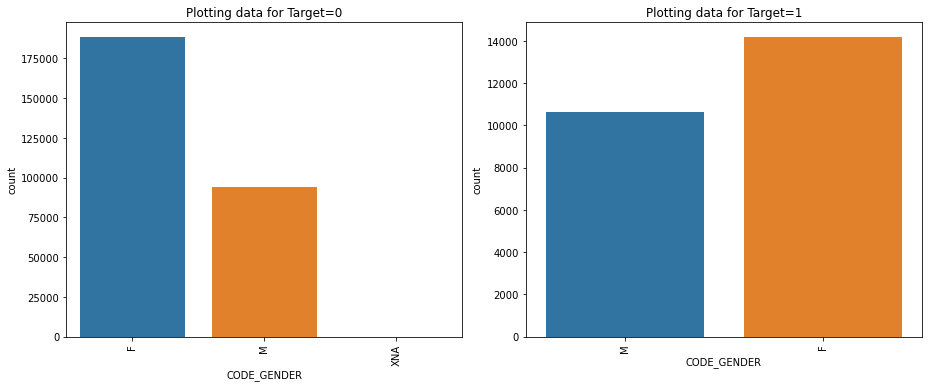

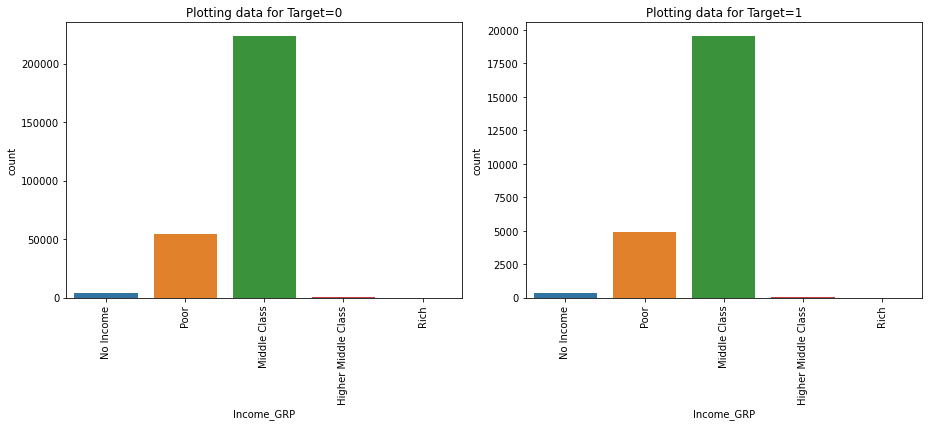

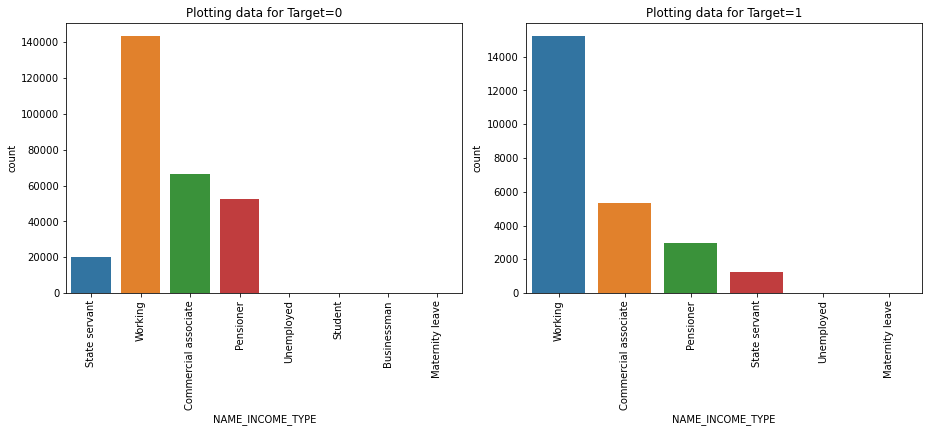

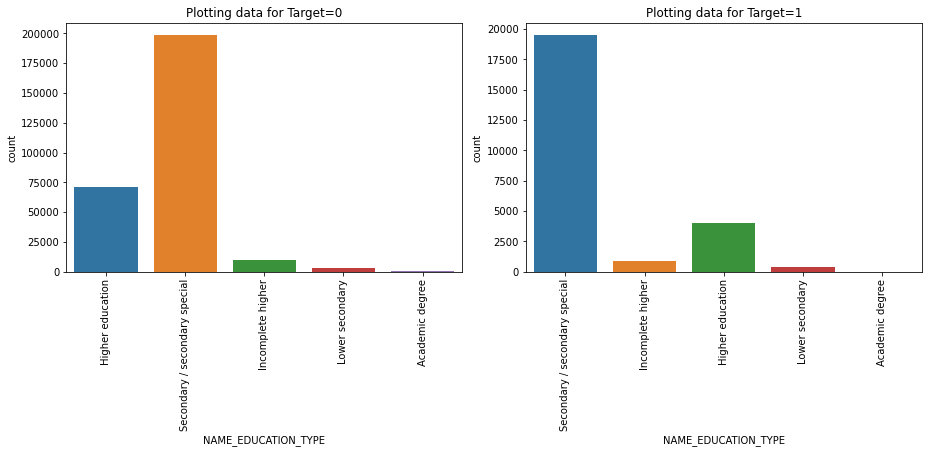

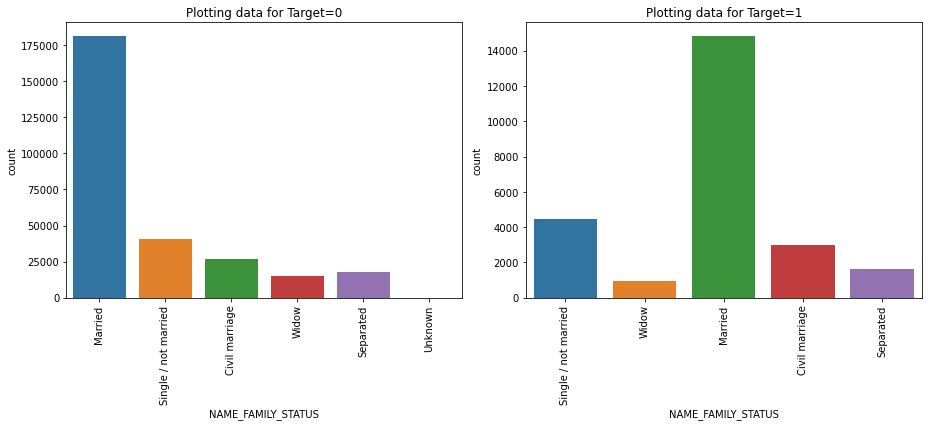

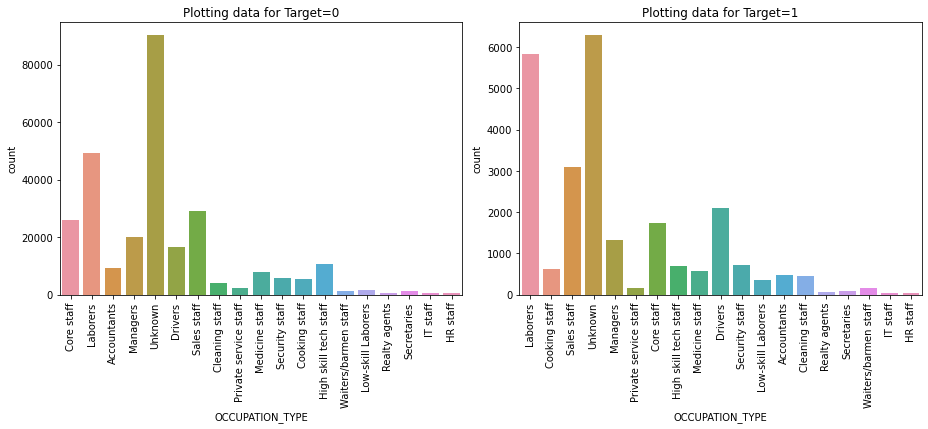

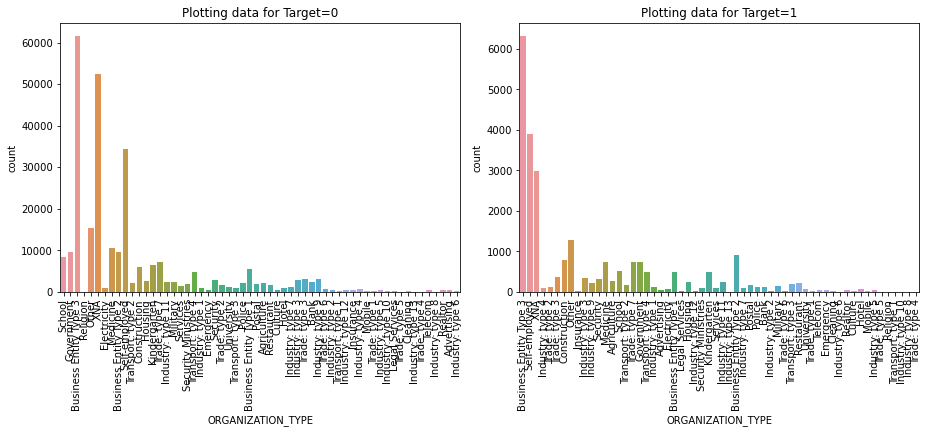

In [371]:
## Creating loop to get the graphs for all the key_factors
for i in key_factors:
    plotting(i,None)

<function matplotlib.pyplot.show(close=None, block=None)>

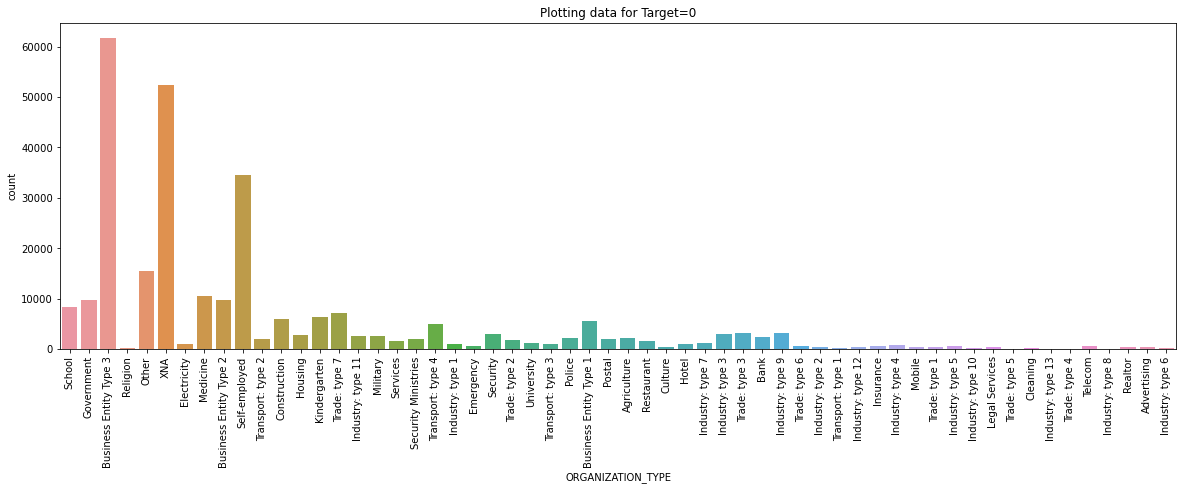

In [380]:
plt.figure(figsize = (20,6))
sns.countplot(x=dfa_T0['ORGANIZATION_TYPE'], hue=None, data=dfa_T0)
plt.xticks(rotation=90)
plt.title('Plotting data for Target=0')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

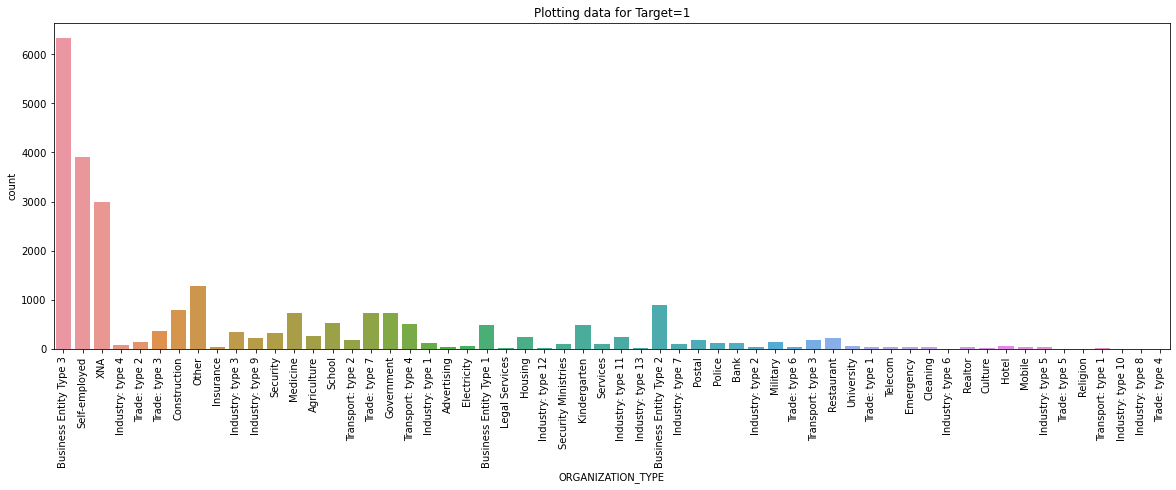

In [381]:
plt.figure(figsize = (20,6))
sns.countplot(x=dfa_T1['ORGANIZATION_TYPE'], hue=None, data=dfa_T1)
plt.xticks(rotation=90)
plt.title('Plotting data for Target=1')
plt.show

<AxesSubplot:ylabel='CNT_FAM_MEMBERS'>

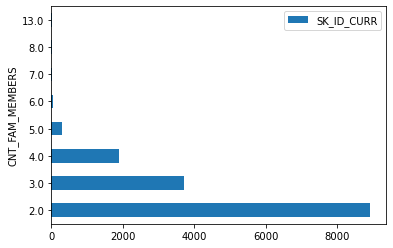

In [562]:
## Family Status Vs Family Members graph
dfa_T1[dfa_T1['NAME_FAMILY_STATUS']=='Married'].groupby('CNT_FAM_MEMBERS').agg({'SK_ID_CURR':'count'}).plot.barh()

## Observations on the Univariate analysis done on key factors

1. Number of female customers applying for loan are more as compared to male customers. This might be because additional benefits are provided if loan is taken on female customer name
2. Middle Class income group is the on who is going for the loan as compared to other income groups. Middle class group is also prone to irregular payments
3. Working individuals are having high frequency of taking loans for different entities but also add upto irregularities in payment which can lead to loss of company. This group is mainly interested in taking loans which can be beneficial to company but can incurr the loss as well.
4. Customer with Secondary/Secondary Special education backgroung are the major group applying for loans and also highest is paying the loan regularly but same behaviour is observed in for irregulaties in payment for this group.
5. Married customers are the major group who are applying for the loans nd also highest is paying the loan regularly but same behaviour is observed in for irregulaties in payment for this group.
6. As many customers have not mentioned there occupation type, we replaced it with unknown. If we dont consider unknown category, then the customers having occupation which is based on daily wages or below average income occupations are the ones having irregularities in loan repayment.
7. Suprisingly customers having business as organization type are the ones who are more irregular in repaying the loans followed by Self-employed customers

## Perform Bivariate Analysis

1. Gender & AMT_GOODS_PRICE
2. Gender and Contract Type
2. Family status & contract Type
3. Occupation Type & Contract type
4. Organization Type & Contract type
5. Income Group & Contract Type

In [399]:
dfa_T0['CODE_GENDER'] = dfa_T0['CODE_GENDER'][dfa_T0['CODE_GENDER']!='XNA']

<function matplotlib.pyplot.show(close=None, block=None)>

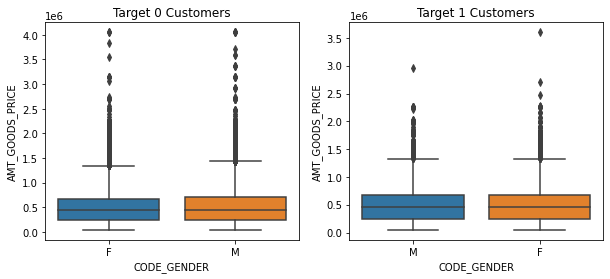

In [410]:
## Box plot Occupation type Vs AMT_GOOD_PRICE

plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
plt.title('Target 0 Customers')
sns.boxplot(data = dfa_T0, x = 'CODE_GENDER', y = 'AMT_GOODS_PRICE')

plt.subplot(1,2,2)
plt.title('Target 1 Customers')
sns.boxplot(data = dfa_T1, x = 'CODE_GENDER', y = 'AMT_GOODS_PRICE')
plt.show

In [401]:
dfa_T0['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         254999
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64

In [402]:
## First create columnw with Contract_Type_Flag. 1 - Cash Loans, 0 - Revolving Loans

dfa_T0['Contract_Type_Flag']= np.where(dfa_T0.NAME_CONTRACT_TYPE=='Cash loans',1,0)
dfa_T1['Contract_Type_Flag']= np.where(dfa_T1.NAME_CONTRACT_TYPE=='Cash loans',1,0)

In [403]:
dfa_T0['Contract_Type_Flag'].value_counts()

1    254999
0     27675
Name: Contract_Type_Flag, dtype: int64

In [424]:
# Define funtion to perform bivariate analyisis

def biplotting (column):
    col = column
    fig = plt.figure(figsize=(13,10))
    
    ax3 = plt.subplot(223)
    plt.title('Target 0 Customers')
    dfa_T0.groupby(col)['Contract_Type_Flag'].mean().plot.bar()
    plt.xticks(rotation=90)
    plt.show

    ax4 = plt.subplot(224)
    plt.title('Target 1 Customers')
    dfa_T1.groupby(col)['Contract_Type_Flag'].mean().plot.bar()
    plt.xticks(rotation=90)

    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

In [425]:
bivar_key_columns = ['NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

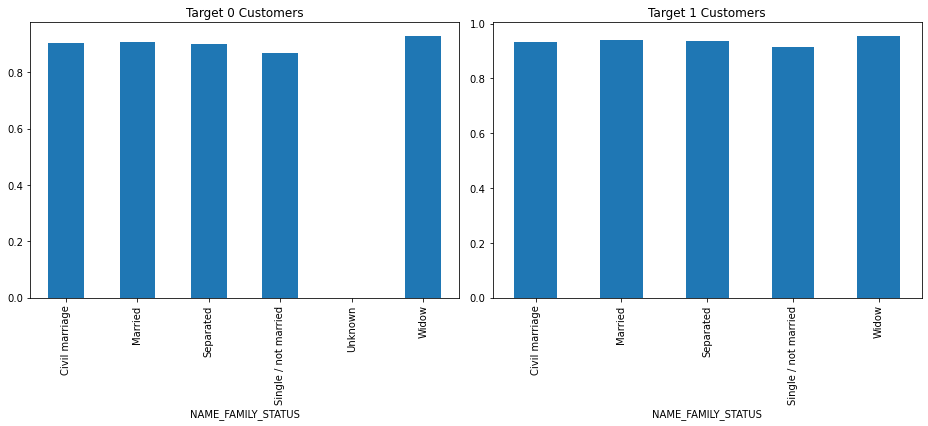

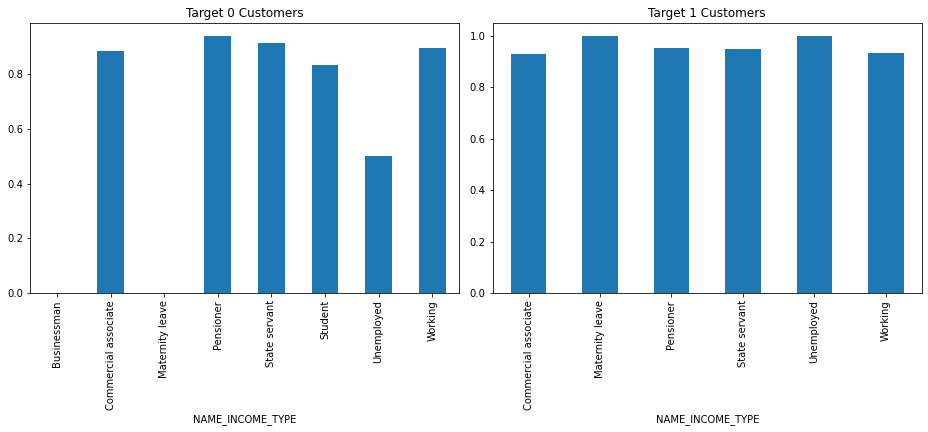

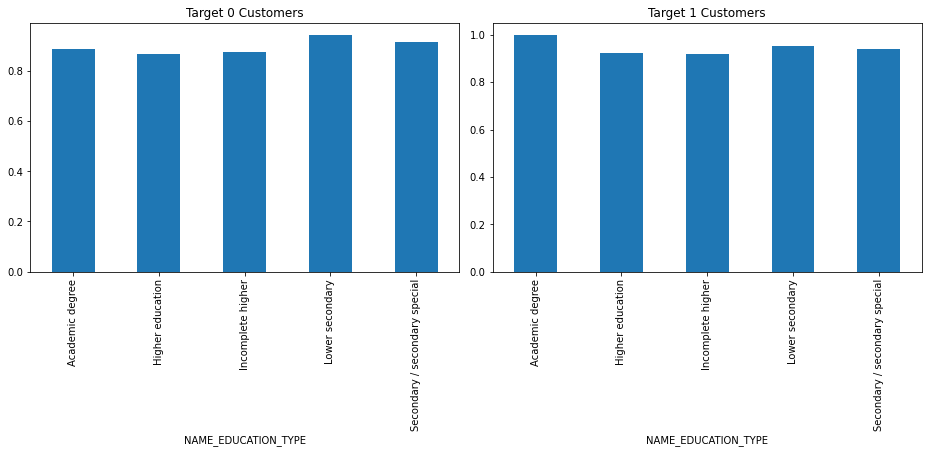

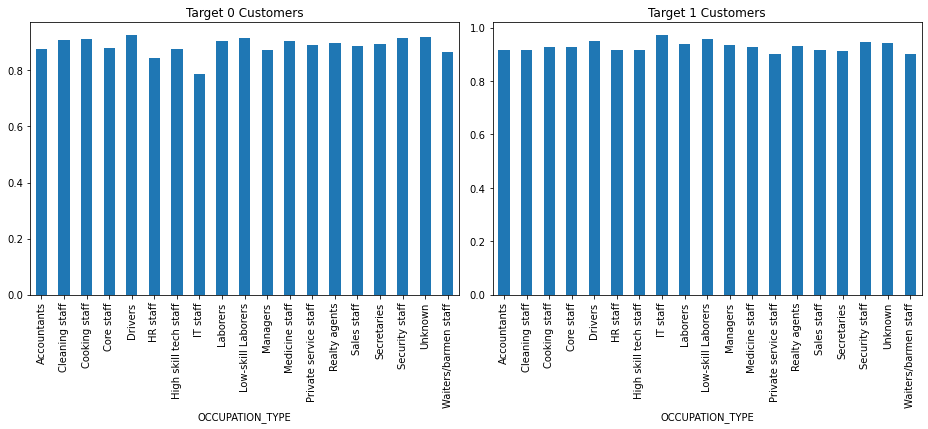

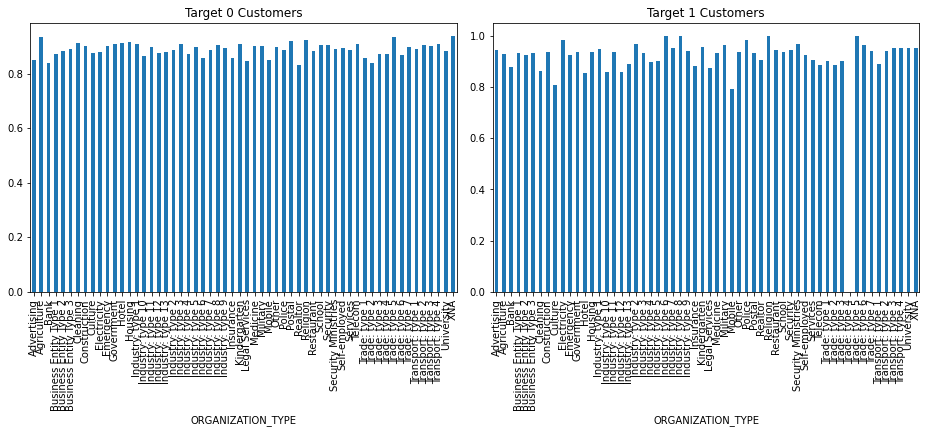

In [426]:
for i in bivar_key_columns:
    biplotting(i)

## Observations of Bivariate Analysis of Key factors

1. Majority of the Customers are taking loan for the goods price ranging below 150K irrespective of gender type.
2. Customters from all the Family status are more inclined towards appling for cash loans, but the Widow customers are some what high. Repyment irregulatiies is almost consistent with customers from all the family status
3. Pensioner, State Servant, Commercial Associate & Working customers are inclined towards applying for cash loans and are repaying on time but customer who are unemployed or on Maternity leaves are the ones who are more irregular in repaying the loans
4. Irrespective of education type, more customers are inclined towards applying for cash loans but
    i - Lower secondary are the ones who are repaying the loans of time
    ii - Customers pursuing Academic degrees are more irregulars in repaying the loans
5. Almost all the occupation type under Target 0 customers are irregular in repaying the loans but IT Staff people stands out
6. Customers working in organizations like Electricity, Industry, Religios places and Trading companies stands out in irregular repayment of loans

## Analyse the Previous Application Data

In [427]:
dfpa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [428]:
## Remove the columns having more that 50% null data
x = len(dfpa)/2
dfpa = dfpa[dfpa.columns[dfpa.isnull().sum() < x]]

In [429]:
dfpa.shape

(1670214, 33)

In [440]:
dfpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669868 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1669868 non-null  int64  
 1   SK_ID_CURR                   1669868 non-null  int64  
 2   NAME_CONTRACT_TYPE           1669868 non-null  object 
 3   AMT_ANNUITY                  1669868 non-null  float64
 4   AMT_APPLICATION              1669868 non-null  float64
 5   AMT_CREDIT                   1669867 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1669868 non-null  object 
 8   HOUR_APPR_PROCESS_START      1669868 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1669868 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1669868 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1669868 non-null  object 
 12  NAME_CONTRACT_STATUS         1669868 non-n

In [430]:
## Check the null data in the remaining columns

dfpa.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [431]:
## Clean the data for the remaining columns
dfpa['AMT_ANNUITY'] = dfpa['AMT_ANNUITY'].fillna(dfpa['AMT_ANNUITY'].median())
dfpa['NAME_TYPE_SUITE'] = dfpa['NAME_TYPE_SUITE'].fillna('Unknown')
dfpa['AMT_GOODS_PRICE'] = dfpa['AMT_GOODS_PRICE'].fillna(dfpa['AMT_GOODS_PRICE'].median())
dfpa['CNT_PAYMENT'] = dfpa['CNT_PAYMENT'].fillna(dfpa['CNT_PAYMENT'].median())
dfpa['DAYS_FIRST_DRAWING'] = dfpa['DAYS_FIRST_DRAWING'].fillna(dfpa['DAYS_FIRST_DRAWING'].median())
dfpa['DAYS_FIRST_DUE'] = dfpa['DAYS_FIRST_DUE'].fillna(dfpa['DAYS_FIRST_DUE'].median())
dfpa['DAYS_LAST_DUE_1ST_VERSION'] = dfpa['DAYS_LAST_DUE_1ST_VERSION'].fillna(dfpa['DAYS_LAST_DUE_1ST_VERSION'].median())
dfpa['DAYS_TERMINATION'] = dfpa['DAYS_TERMINATION'].fillna(dfpa['DAYS_TERMINATION'].median())
dfpa['NFLAG_INSURED_ON_APPROVAL'] = dfpa['NFLAG_INSURED_ON_APPROVAL'].fillna(dfpa['NFLAG_INSURED_ON_APPROVAL'].mode())
dfpa = dfpa[~dfpa['PRODUCT_COMBINATION'].isnull()]

In [452]:
dfpa.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                     0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                         0
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [450]:
dfpa['DAYS_LAST_DUE'] = dfpa['DAYS_LAST_DUE'].fillna(dfpa['DAYS_LAST_DUE'].median())

In [456]:
dfpa['NFLAG_INSURED_ON_APPROVAL'] = dfpa['NFLAG_INSURED_ON_APPROVAL'].fillna(0.0)

In [457]:
dfpa.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

In [458]:
dfpa = dfpa[~dfpa['AMT_CREDIT'].isnull()]

In [459]:
dfpa.shape

(1669867, 33)

In [460]:
dfpa.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,365243.0,-831.0,-361.0,-537.0,-499.0,0.0


In [480]:
dfpa_mod = pd.DataFrame(data = dfpa, columns = ['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_TYPE','AMT_APPLICATION','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CASH_LOAN_PURPOSE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','CHANNEL_TYPE','NAME_YIELD_GROUP','NFLAG_INSURED_ON_APPROVAL'] )

In [481]:
dfpa_mod.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CASH_LOAN_PURPOSE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CHANNEL_TYPE,NAME_YIELD_GROUP,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,17145.0,17145.0,Approved,Cash through the bank,XAP,XAP,Repeater,Country-wide,middle,0.0
1,2802425,108129,Cash loans,607500.0,607500.0,Approved,XNA,XNA,XAP,Repeater,Contact center,low_action,1.0
2,2523466,122040,Cash loans,112500.0,112500.0,Approved,Cash through the bank,XNA,XAP,Repeater,Credit and cash offices,high,1.0
3,2819243,176158,Cash loans,450000.0,450000.0,Approved,Cash through the bank,XNA,XAP,Repeater,Credit and cash offices,middle,1.0
4,1784265,202054,Cash loans,337500.0,337500.0,Refused,Cash through the bank,Repairs,HC,Repeater,Credit and cash offices,high,0.0


In [482]:
dfpa_mod['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922314
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [483]:
dfpa_mod['NAME_CASH_LOAN_PURPOSE'].replace('XNA',value = 'Unknown', inplace = True)

In [484]:
dfpa_mod['CODE_REJECT_REASON'].value_counts()

XAP       1352777
HC         175202
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5242
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [485]:
dfpa_mod['NAME_CLIENT_TYPE'].value_counts()

Repeater     1230959
New           301342
Refreshed     135625
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [486]:
dfpa_mod['CHANNEL_TYPE'].value_counts()

Credit and cash offices       719965
Country-wide                  494347
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57045
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [487]:
dfpa_mod['NAME_YIELD_GROUP'].replace('XNA',value = 'Unknown', inplace = True)

In [488]:
dfpa_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SK_ID_PREV                 1669867 non-null  int64  
 1   SK_ID_CURR                 1669867 non-null  int64  
 2   NAME_CONTRACT_TYPE         1669867 non-null  object 
 3   AMT_APPLICATION            1669867 non-null  float64
 4   AMT_GOODS_PRICE            1669867 non-null  float64
 5   NAME_CONTRACT_STATUS       1669867 non-null  object 
 6   NAME_PAYMENT_TYPE          1669867 non-null  object 
 7   NAME_CASH_LOAN_PURPOSE     1669867 non-null  object 
 8   CODE_REJECT_REASON         1669867 non-null  object 
 9   NAME_CLIENT_TYPE           1669867 non-null  object 
 10  CHANNEL_TYPE               1669867 non-null  object 
 11  NAME_YIELD_GROUP           1669867 non-null  object 
 12  NFLAG_INSURED_ON_APPROVAL  1669867 non-null  float64
dtypes: float64(3

## Perform Univariate Analysis on the Key Factors
1. NAME_CONTRACT_TYPE
2. NAME_CONTRACT_STATUS
3. NAME_CASH_LOAN_PURPOSE
4. CODE_REJECT_REASON
5. CHANNEL_TYPE
6. NAME_YIELD_GROUP
7. NFLAG_INSURED_ON_APPROVAL
8. NAME_CLIENT_TYPE

In [494]:
# Define funtion to check impact of key factors on previous loan application

def prev_plot(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,10))

    plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=dfpa_mod)
    plt.xticks(rotation=90)
    plt.title('Plotting data for:'+column)

    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

In [495]:
Key_Fact_PA = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CASH_LOAN_PURPOSE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','CHANNEL_TYPE','NAME_YIELD_GROUP','NFLAG_INSURED_ON_APPROVAL']

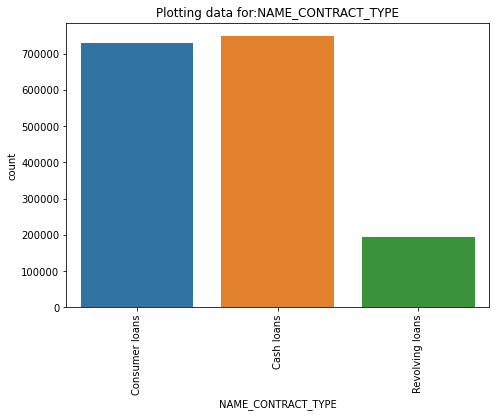

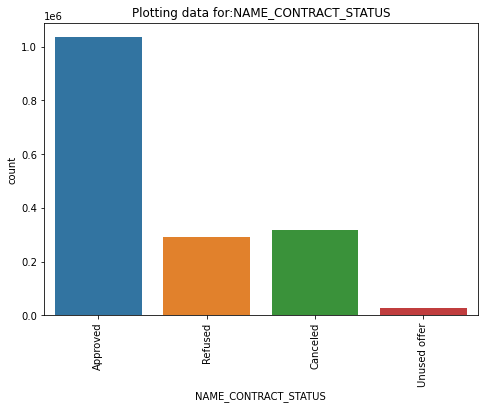

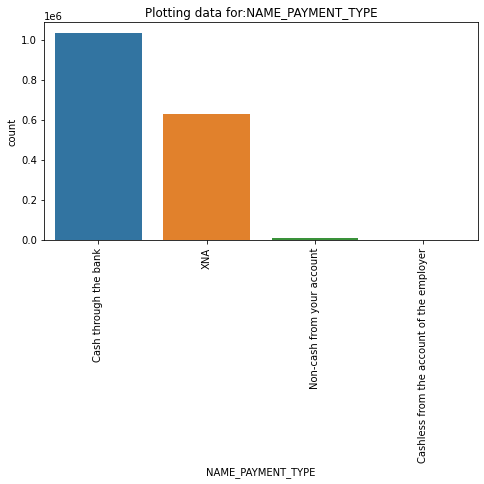

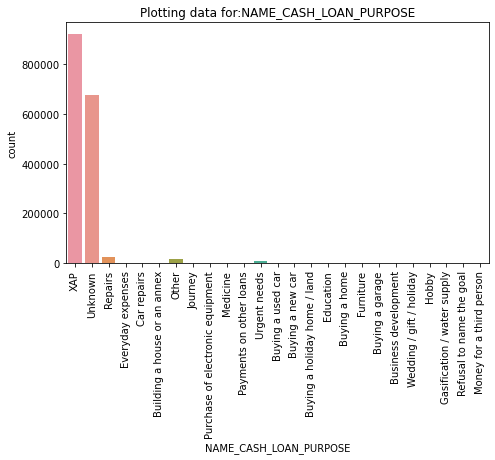

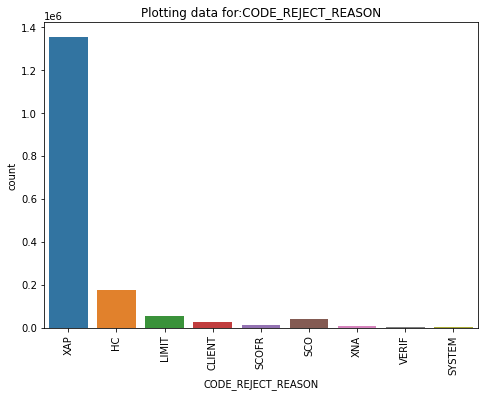

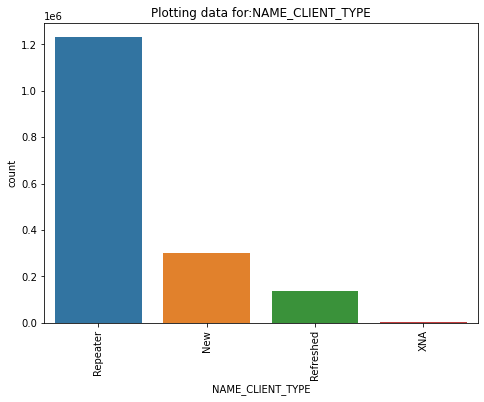

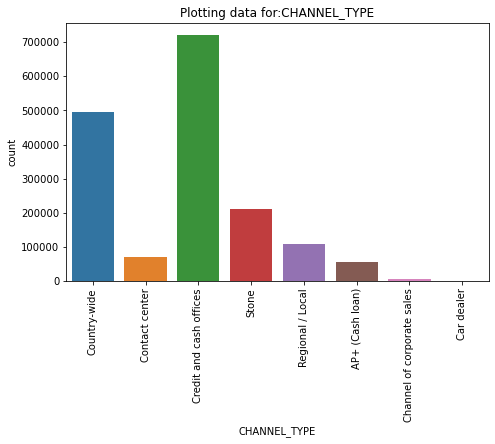

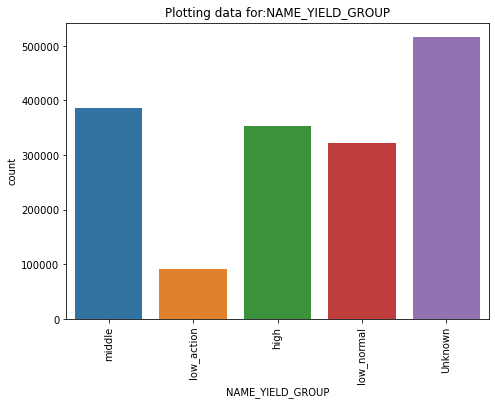

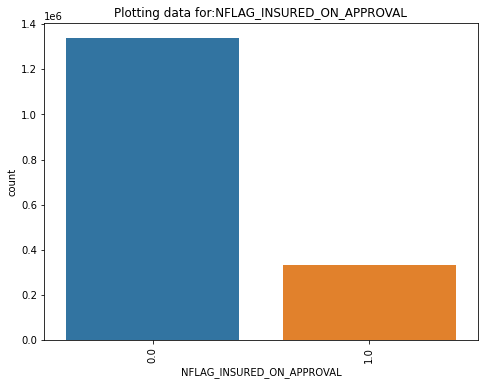

In [496]:
for i in Key_Fact_PA:
    prev_plot(i, None)

## Observations of Univariate Ananlysis

1. Consumer Loans and Cash Loans are more popular among the customers
2. Payment type which was mainly chosen by customer is Cash through bank while applying for the loan
3. Mainly the loan applications were for reparing purpose
4. Customer who have applied for loans are mostly repeaters
5. Majority of the Customers have applied for the loan through Credit/Cash offices
6. While applying for the loan majority if the cutomers have not opted for insurance

In [517]:
dfpa_mod['Approved_Flag'] = np.where(dfpa_mod['NAME_CONTRACT_STATUS']=='Approved',1,0)

In [518]:
res1 = pd.pivot_table(data = dfpa_mod,index = 'NAME_CONTRACT_STATUS', columns = 'CODE_REJECT_REASON', values = 'Approved_Flag',  fill_value = 0)

<function matplotlib.pyplot.show(close=None, block=None)>

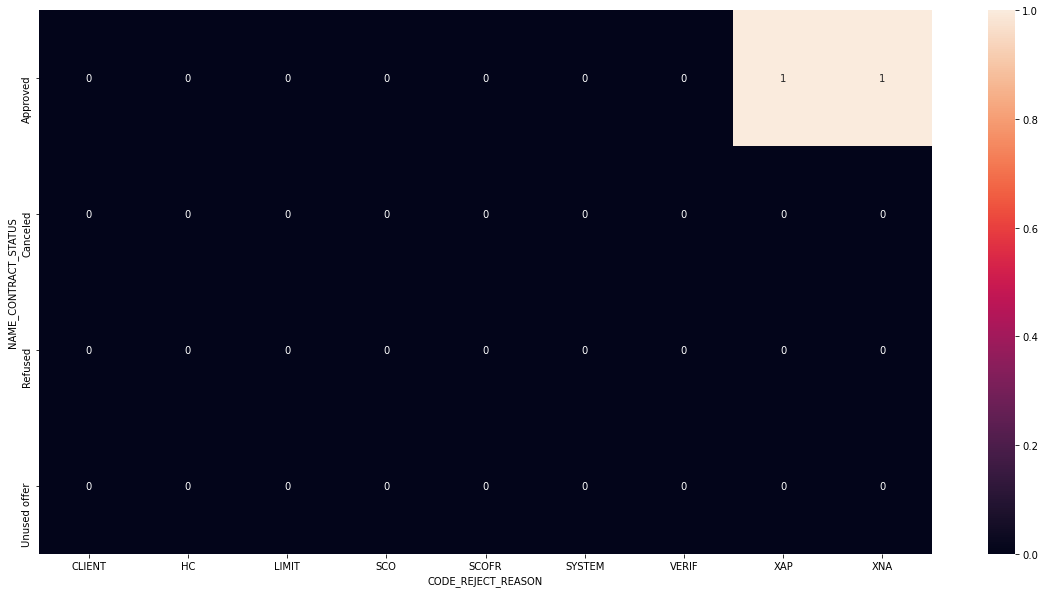

In [520]:
plt.figure(figsize = (20,10))
sns.heatmap(res1, annot = True)
plt.show

## Merge two Data fram and provide final analysis

In [498]:
## Merging data for Target 0 customers
df_mer = pd.concat([dfa_T0, dfpa_mod], axis=1, join="inner")

In [499]:
## Merging data for Target 1 customers
df_mer1 = pd.concat([dfa_T1, dfpa_mod], axis=1, join="inner")

In [529]:
df_mer.shape, df_mer1.shape

((282623, 68), (24821, 69))

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

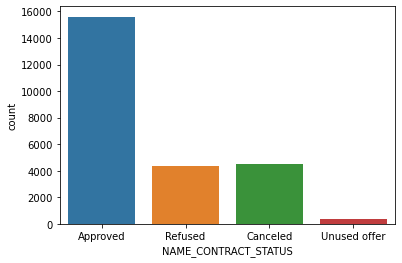

In [528]:
sns.countplot(df_mer1['NAME_CONTRACT_STATUS'])

## Conclusion - Even though the previous loan applications were approved, the same customer is having chances to have irregularities of repaying the loan